In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [191]:
!pip install mplcyberpunk
!pip install missingno

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import itertools
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Breathtaking visuals
import mplcyberpunk

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [193]:
plt.style.use("cyberpunk")

---

# 1. Load Data

In [194]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [195]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [196]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [197]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


---

# 2. Data Exploration

Dataset rows and columns.

In [198]:
train_col = train.columns
print("No. of Training columns & rows:", train.shape, "\n", "Training columns: \n", train_col)

print("-"*100)
test_col = test.columns
print("No. of Testing columns & rows:", test.shape, "\n", "Testing columns: \n", test_col)

No. of Training columns & rows: (8693, 14) 
 Training columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
----------------------------------------------------------------------------------------------------
No. of Testing columns & rows: (4277, 13) 
 Testing columns: 
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [199]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [200]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


In [201]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [202]:
print(train.info())
print("-"*100)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'

## **Insights**

Train data:
* Number of columns in train data: 14
* Number of rows in train data: 8693
* Number of missing values in train data: 2324

Test data:
* Number of columns in test data: 13
* Number of rows in test data: 4277
* Number of missing values in test data: 1117

---

# Missing Values

In [203]:
train_Na = train.isnull().sum()
print(train_Na)
print("Total missing data:", train_Na.sum())

print("-"*100)

test_Na = test.isnull().sum()
print(test_Na)
print("Total missing data:", test_Na.sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Total missing data: 2324
----------------------------------------------------------------------------------------------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
Total missing data: 1117


In [204]:
100 * train.isnull().sum() / len(train)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [205]:
100 * test.isnull().sum() / len(test)

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

<AxesSubplot:>

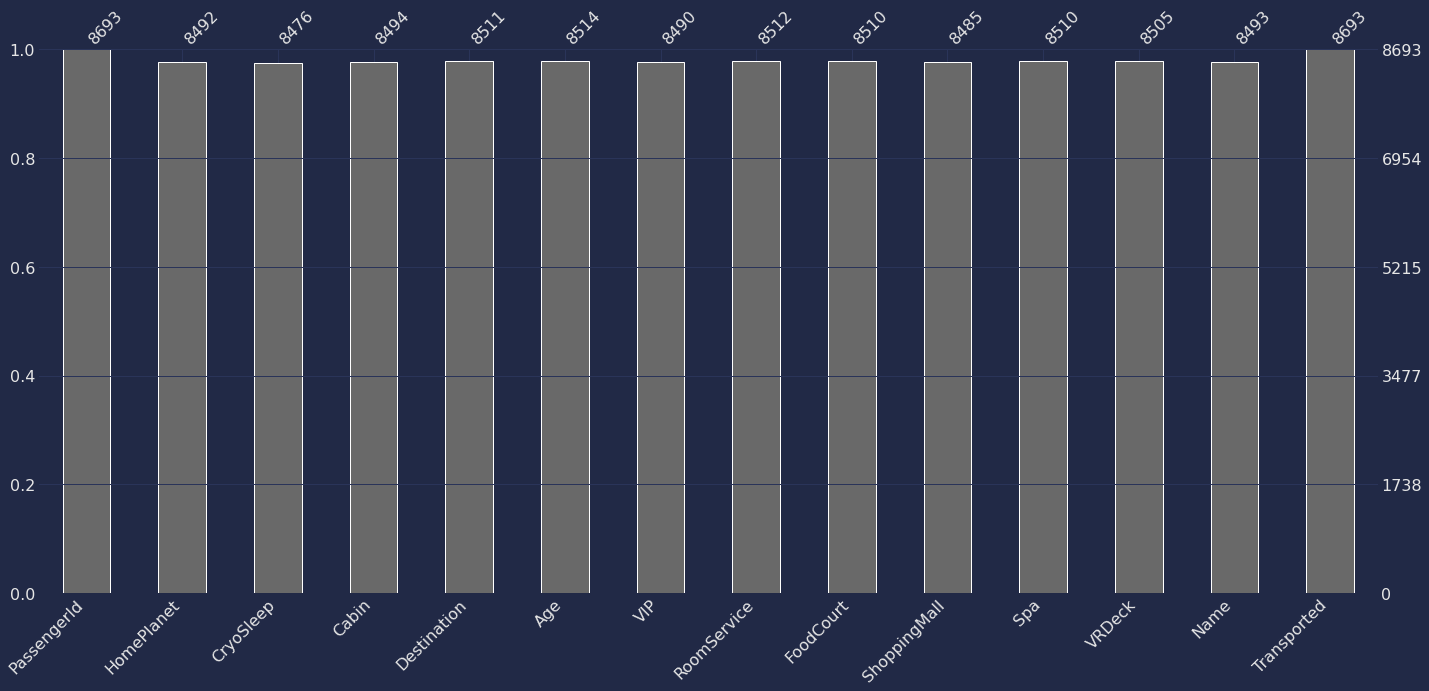

In [206]:
import missingno as msno
msno.bar(train)

<AxesSubplot:>

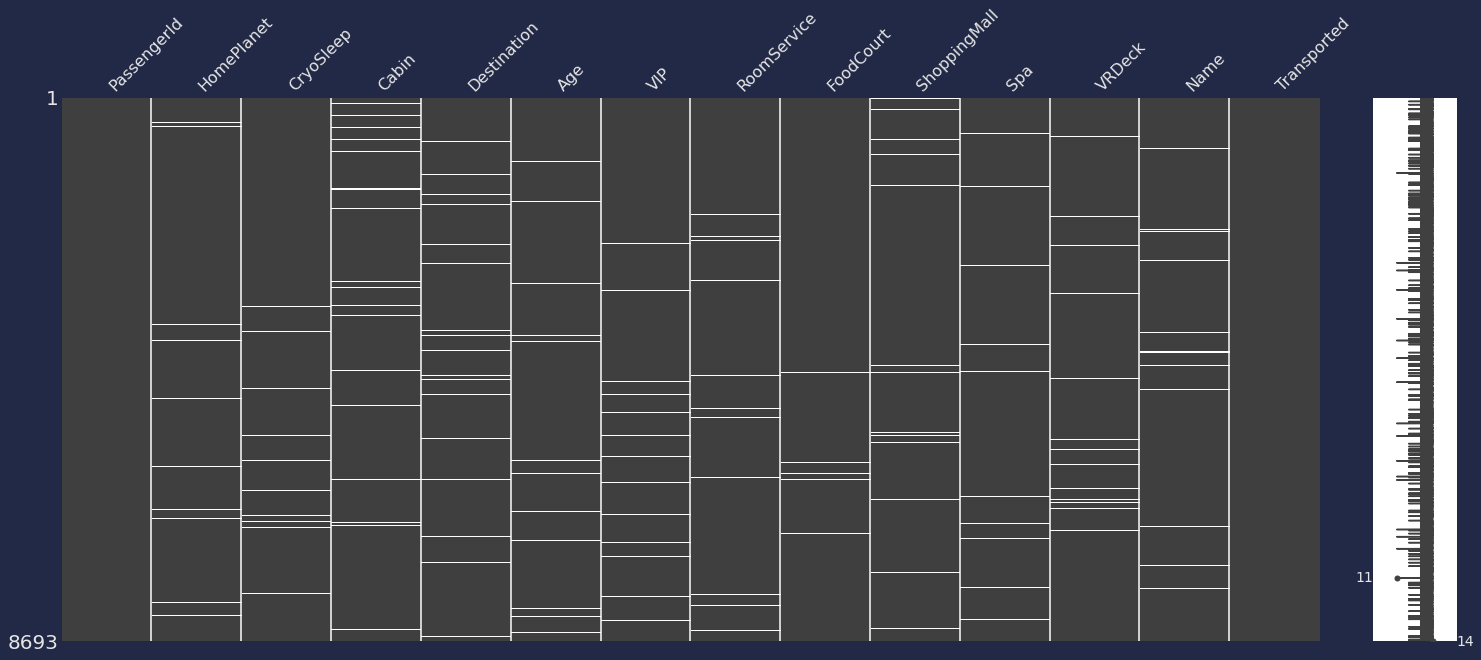

In [207]:
msno.matrix(train)

This helps us to know how the missing data is distributed through the data, that is if they are localized or evenly spread, or is there any pattern and many such questions.

To ensure that there are no correlations between them.

<AxesSubplot:>

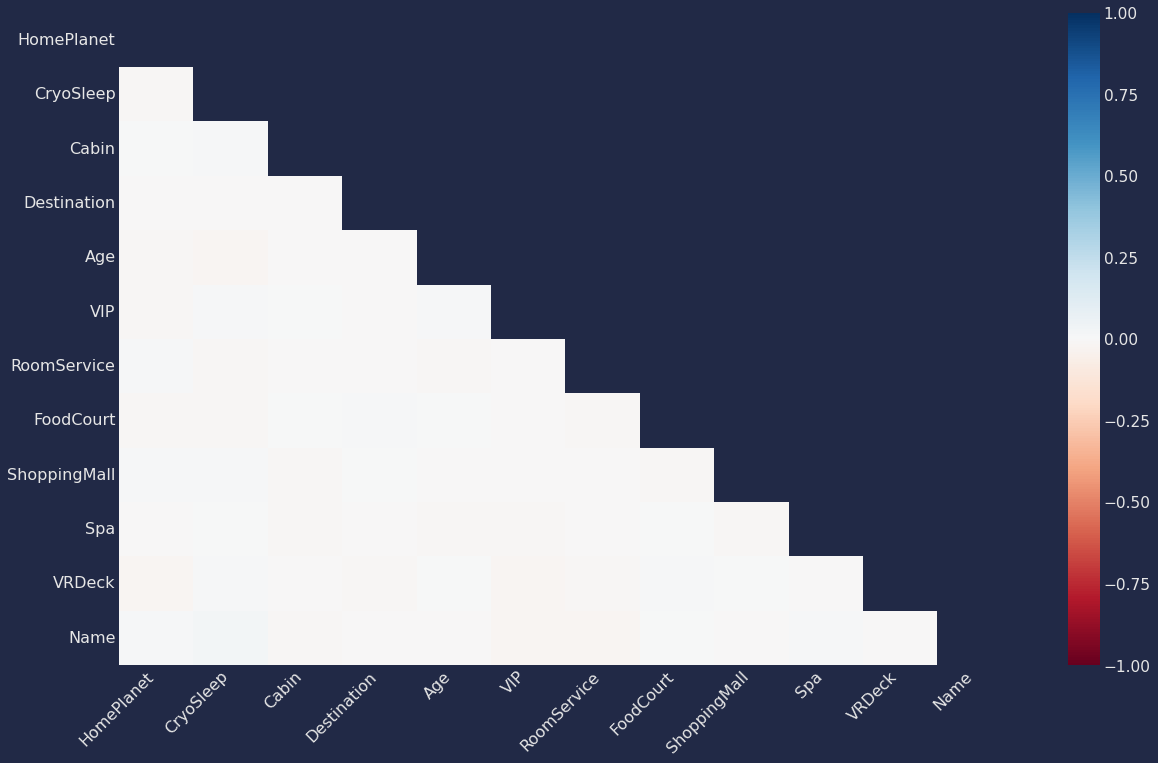

In [208]:
msno.heatmap(train)

## Imputation

In [209]:
# Dealing with Numeric features

train['Age']=train['Age'].replace(np.NaN,train['Age'].median())
train['RoomService']=train['RoomService'].replace(np.NaN,train['RoomService'].median())
train['FoodCourt']=train['FoodCourt'].replace(np.NaN,train['FoodCourt'].median())
train['ShoppingMall']=train['ShoppingMall'].replace(np.NaN,train['ShoppingMall'].median())
train['VRDeck']=train['VRDeck'].replace(np.NaN,train['VRDeck'].median())
train['Spa']=train['Spa'].replace(np.NaN,train['Spa'].median())

In [210]:
test['Age']=test['Age'].replace(np.NaN,test['Age'].median())
test['RoomService']=test['RoomService'].replace(np.NaN,test['RoomService'].median())
test['FoodCourt']=test['FoodCourt'].replace(np.NaN,test['FoodCourt'].median())
test['ShoppingMall']=test['ShoppingMall'].replace(np.NaN,test['ShoppingMall'].median())
test['VRDeck']=test['VRDeck'].replace(np.NaN,test['VRDeck'].median())
test['Spa']=test['Spa'].replace(np.NaN,test['Spa'].median())

Here, we cannot compute mean and median. So, we can fill the missing values with the mode or most frequently occurring class/category.

In [211]:
# Dealing with categorical features

train['Cabin']=train['Cabin'].fillna(train['Cabin'].value_counts().index[0])
train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].value_counts().index[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].value_counts().index[0])
train['Destination']=train['Destination'].fillna(train['Destination'].value_counts().index[0])
train['VIP']=train['VIP'].fillna(train['VIP'].value_counts().index[0])
train['Name']=train['Name'].fillna(train['Name'].value_counts().index[0])

In [212]:
test['Cabin']=test['Cabin'].fillna(test['Cabin'].value_counts().index[0])
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].value_counts().index[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].value_counts().index[0])
test['Destination']=test['Destination'].fillna(test['Destination'].value_counts().index[0])
test['VIP']=test['VIP'].fillna(test['VIP'].value_counts().index[0])
test['Name']=test['Name'].fillna(test['Name'].value_counts().index[0])

In [213]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

# Exploratory Data Analysis (EDA

An EDA is an examination meant to uncover the underlying structure of the information contained within a data-set. It is important because it exposes trends, patterns, and relationships that are not readily apparent at first glance.

The purpose of an EDA is to allow data scientists to analyze the data before coming to any assumption. In this EDA of the spaceship titanic dataset, we'll be looking at the relationships between the feature variables.

## Survival distribution

True     4378
False    4315
Name: Transported, dtype: int64

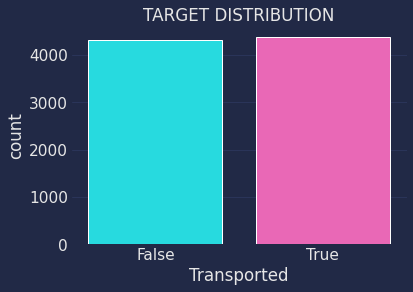

In [214]:
sns.countplot(train['Transported']).set_title("TARGET DISTRIBUTION")

train['Transported'].value_counts()

## Correlational Matrix

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

In [215]:
corr = train.corr()
fig = px.imshow(corr, text_auto = True, aspect = 'auto')
fig.show()

Here we can see that FoodCourt, VRDeck and Spa has a higher correlation.

In [216]:
train_numerical_features = train.select_dtypes(exclude='object')
train_categorical_features = train.select_dtypes(include='object')

## Numerical Features vs Transported

### Age

Text(0.5, 0, 'Age (years)')

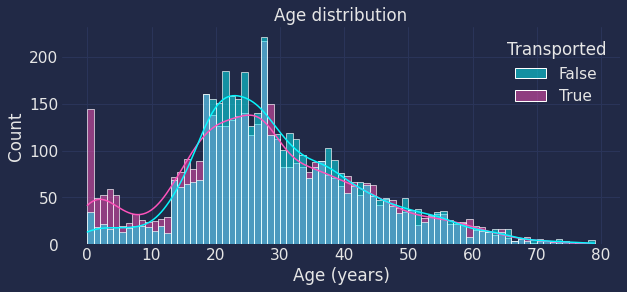

In [217]:
# Figure size
plt.figure(figsize=(10,4))
# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

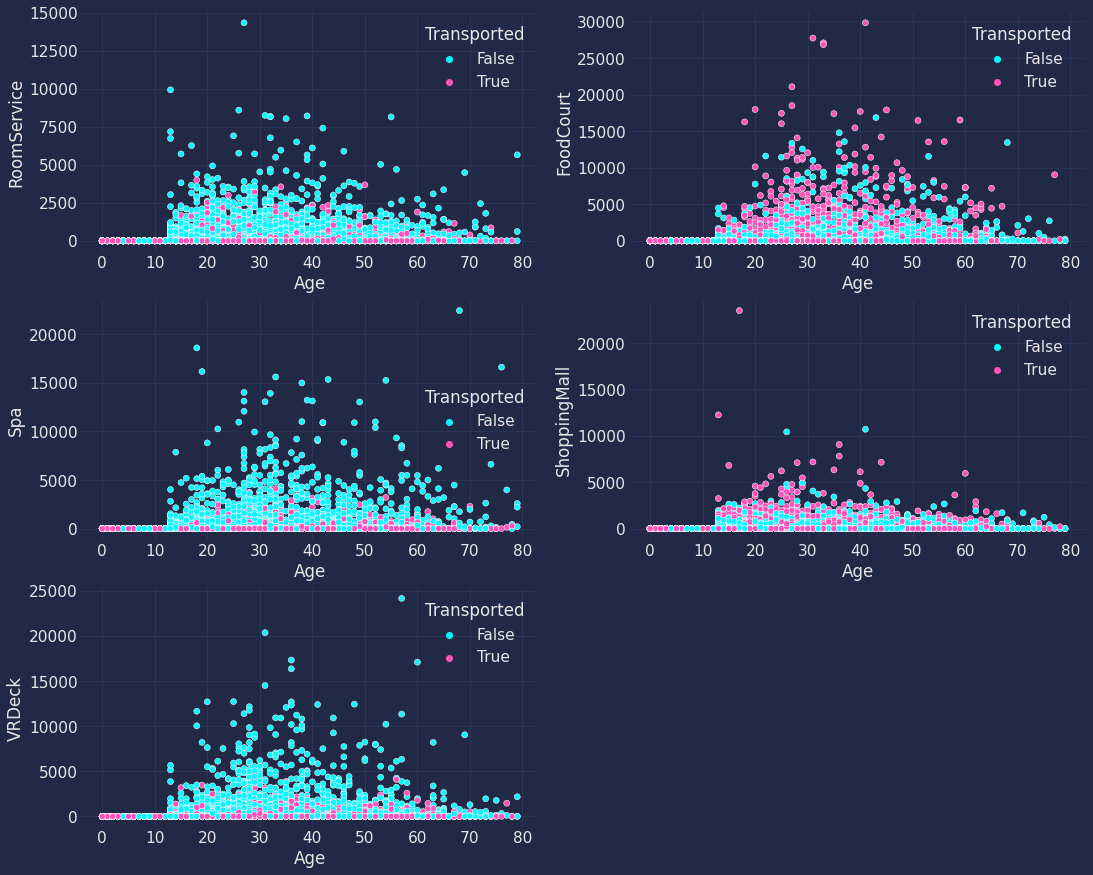

In [218]:
fig = plt.figure(figsize=(18, 15))

plt.subplot(3, 2, 1)
sns.scatterplot(x='Age', y='RoomService', hue='Transported', data=train)

plt.subplot(3, 2, 2)
sns.scatterplot(x='Age', y='FoodCourt', hue='Transported', data=train)

plt.subplot(3, 2, 3)
sns.scatterplot(x='Age', y='Spa', hue='Transported', data=train)

plt.subplot(3, 2, 4)
sns.scatterplot(x='Age', y='ShoppingMall', hue='Transported', data=train)

plt.subplot(3, 2, 5)
sns.scatterplot(x='Age', y='VRDeck', hue='Transported', data=train)

In [219]:
train.groupby(['HomePlanet', 'VIP'])['Age'].median().fillna(0)

HomePlanet  VIP  
Earth       False    24.0
            True     32.0
Europa      False    32.0
            True     35.0
Mars        False    27.0
            True     32.0
Name: Age, dtype: float64

it appears that there were no VIPs that aboarded from Earth.

### Expenditure

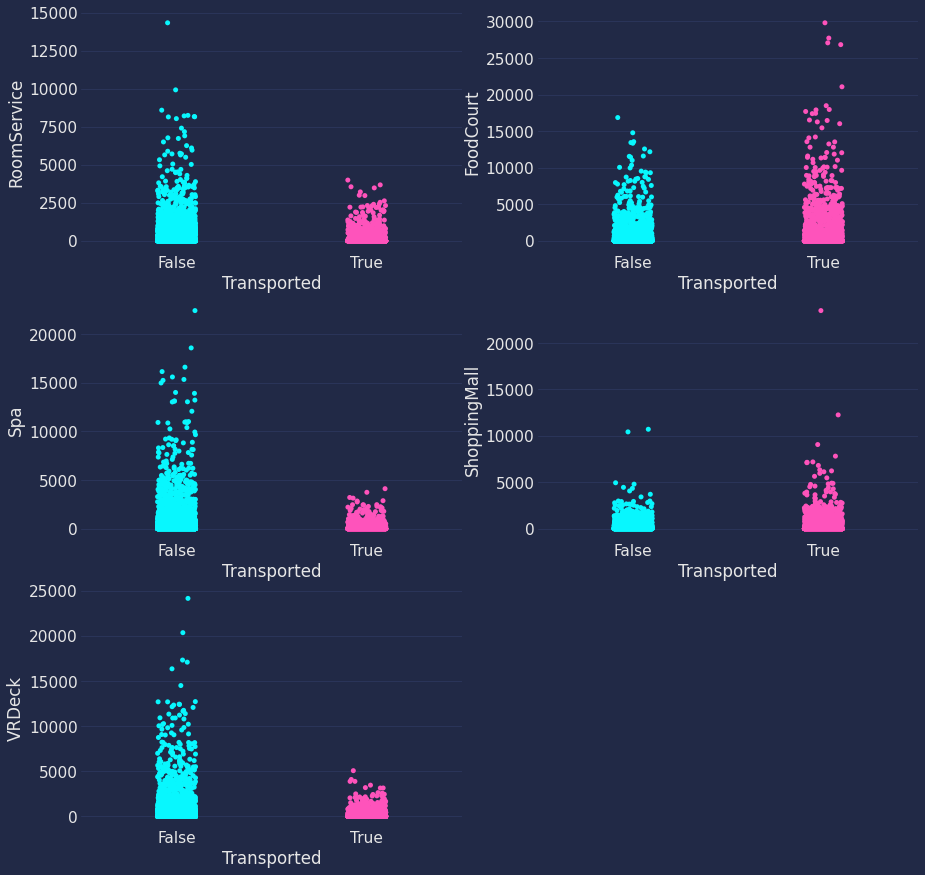

In [220]:
# Expenditure vs Transported

def strip_plot(df, x, y):
    sns.stripplot(x=df[x], y=df[y])
    
    
fig = plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
strip_plot(train, 'Transported', 'RoomService')

plt.subplot(3, 2, 2)
strip_plot(train, 'Transported', 'FoodCourt')

plt.subplot(3, 2, 3)
strip_plot(train, 'Transported', 'Spa')

plt.subplot(3, 2, 4)
strip_plot(train, 'Transported', 'ShoppingMall')

plt.subplot(3, 2, 5)
strip_plot(train, 'Transported', 'VRDeck')

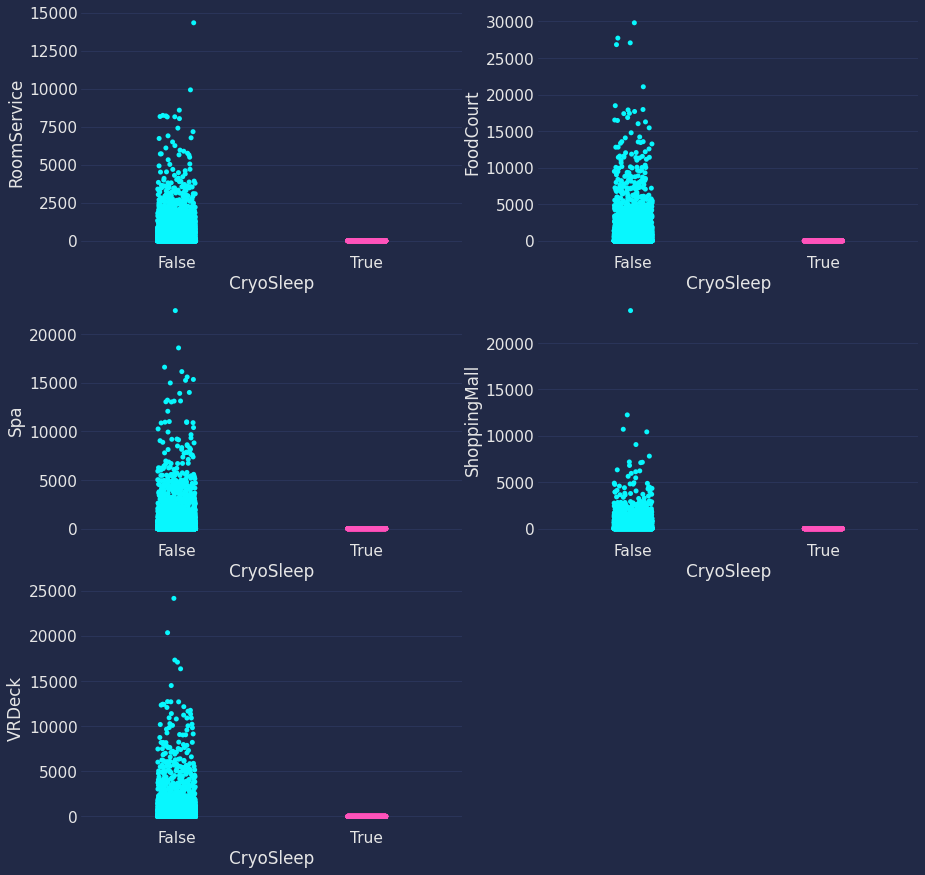

In [221]:
# Expenditure vs Cryosleep

fig = plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
strip_plot(train, 'CryoSleep', 'RoomService')

plt.subplot(3, 2, 2)
strip_plot(train, 'CryoSleep', 'FoodCourt')

plt.subplot(3, 2, 3)
strip_plot(train, 'CryoSleep', 'Spa')

plt.subplot(3, 2, 4)
strip_plot(train, 'CryoSleep', 'ShoppingMall')

plt.subplot(3, 2, 5)
strip_plot(train, 'CryoSleep', 'VRDeck')

<AxesSubplot:xlabel='IsChild', ylabel='count'>

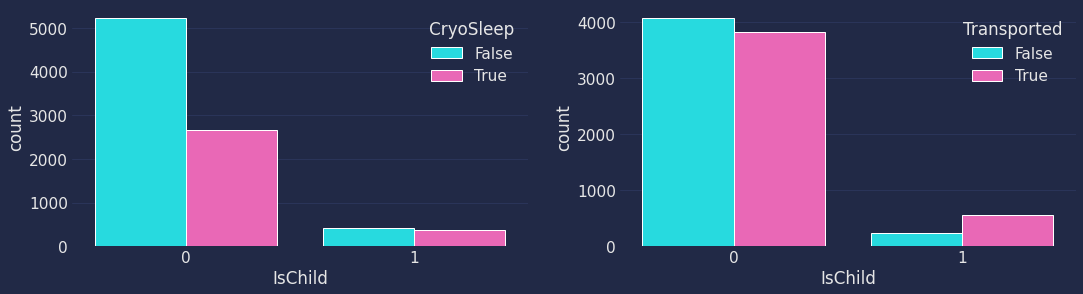

In [222]:

train['IsChild'] = 0
train.loc[train.Age <= 12, 'IsChild'] = 1
train.loc[train.Age > 12, 'IsChild'] = 0
    
fig = plt.figure(figsize=(18, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='IsChild', hue='CryoSleep', data=train)

plt.subplot(3, 2, 2)
sns.countplot(x='IsChild', hue='Transported', data=train)

## Categorical features

In [223]:
print("Categorical features:", train_categorical_features.columns)

Categorical features: Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')


In [224]:
train['PassengerId'].tail(10)

8683    9272_02
8684    9274_01
8685    9275_01
8686    9275_02
8687    9275_03
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, dtype: object

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


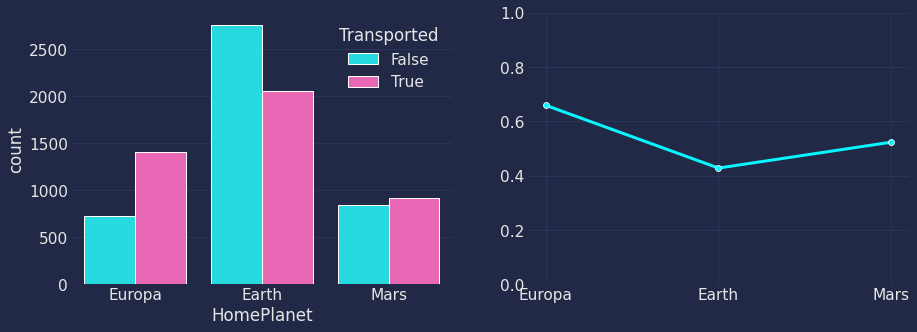

In [225]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='HomePlanet', hue='Transported', data=train)

print(train['HomePlanet'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='HomePlanet', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

False    5656
True     3037
Name: CryoSleep, dtype: int64


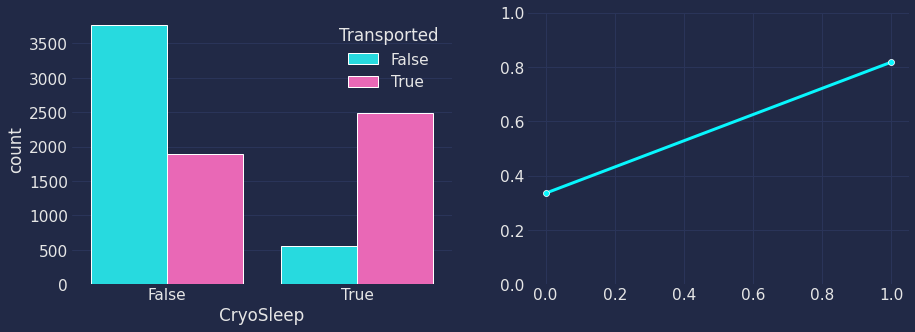

In [226]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='CryoSleep', hue='Transported', data=train)

print(train['CryoSleep'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='CryoSleep', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [227]:
train['Cabin'].value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

**Insight**: Seperate cabin into 3 columns: CabinDeck, CabinNum, CabinSide.

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


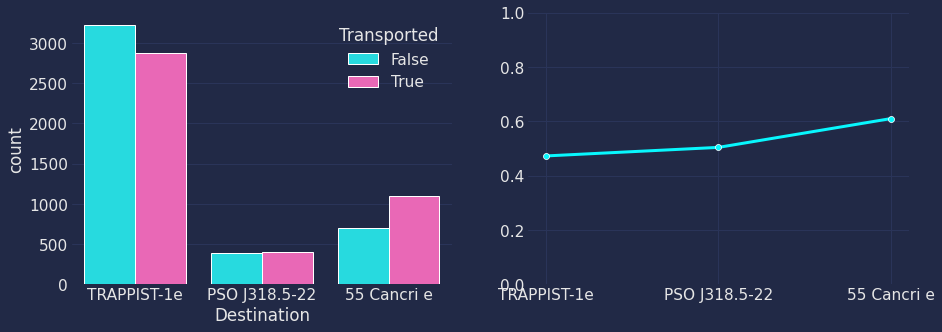

In [228]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='Destination', hue='Transported', data=train)

print(train['Destination'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='Destination', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

False    8494
True      199
Name: VIP, dtype: int64


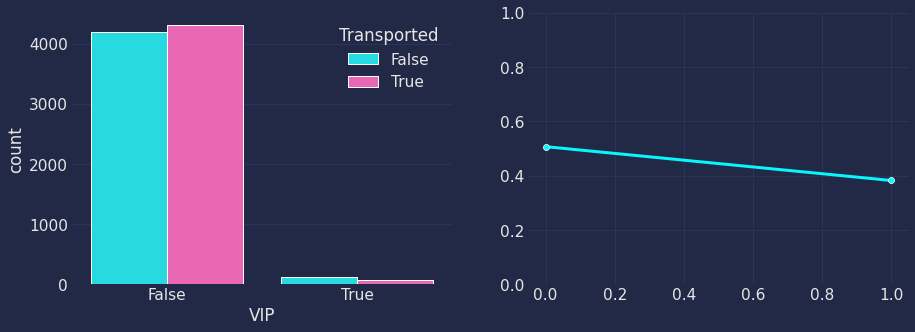

In [229]:
plt.subplots(1,2, figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(x='VIP', hue='Transported', data=train)

print(train['VIP'].value_counts())

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot( x='VIP', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlabel=None, ylabel=None)
plt.show()

## Outliers

In [230]:
fig=px.box(train, y='Age')
fig.show()

In [231]:
fig=px.box(train, y='RoomService')
fig.show()

In [232]:
fig=px.box(train, y='FoodCourt')
fig.show()

In [233]:
fig=px.box(train, y='ShoppingMall')
fig.show()

In [234]:
fig=px.box(train, y='Spa')
fig.show()

In [235]:
fig=px.box(train, y='VRDeck')
fig.show()

The features with outleirs: 
Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

---

# 4. Feature Engineering

### Cabin

In [236]:
#train = train.fillna(train['Cabin'].value_counts().index[0])

In [237]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
IsChild         0
dtype: int64

In [238]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)

test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [239]:
CMAP = ['#003f5c', '#ffa600', '#ff6e54', '#444e86', '#955196', '#dd5182']

In [240]:
# convert cabin num to integer while preserving the nan values
train['CabinNum']= [int(num) if num is not np.nan else num for num in train.CabinNum]

test['CabinNum']= [int(num) if num is not np.nan else num for num in test.CabinNum]

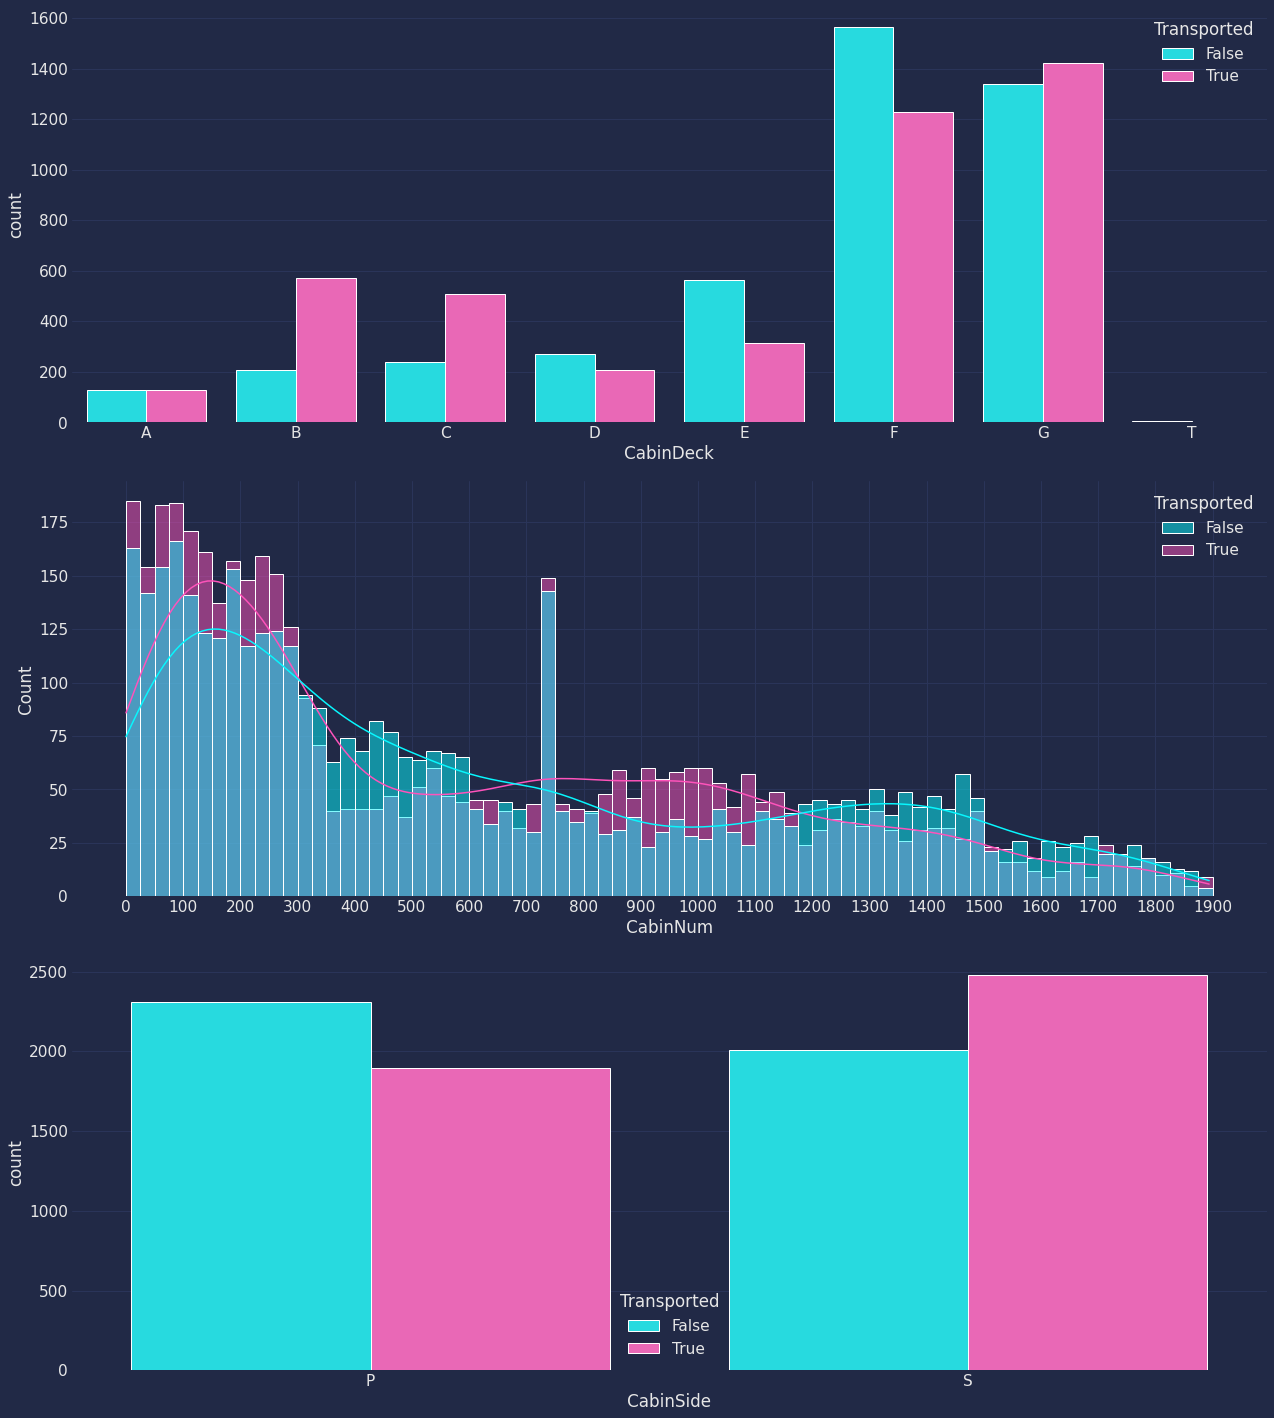

In [241]:
# plot the cabin features
fig, axes = plt.subplots(figsize=(18, 20), nrows=3, ncols=1)
deck_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
# cabin deck
sns.countplot(data=train, x='CabinDeck', hue='Transported', ax=axes[0], order=deck_order)
train['CabinDeck'].value_counts()

# cabin num
sns.histplot(data=train, x='CabinNum', binwidth=25, hue='Transported', ax=axes[1], kde=True)
axes[1].set_xticks(range(0, 2000, 100))

# cabin side
sns.countplot(data=train, x='CabinSide', hue='Transported', ax=axes[2])

fig.tight_layout()
plt.show()

### PassengerId

In [242]:
train[['Id_grp', 'Id_num']] = train['PassengerId'].str.split('_', expand=True)

test[['Id_grp', 'Id_num']] = test['PassengerId'].str.split('_', expand=True)

In [243]:
print(train['Id_num'].value_counts())
print('-'*100)
print(test['Id_num'].value_counts())

01    6217
02    1412
03     571
04     231
05     128
06      75
07      46
08      13
Name: Id_num, dtype: int64
----------------------------------------------------------------------------------------------------
01    3063
02     723
03     269
04     107
05      56
06      33
07      20
08       6
Name: Id_num, dtype: int64


<AxesSubplot:xlabel='Id_num', ylabel='count'>

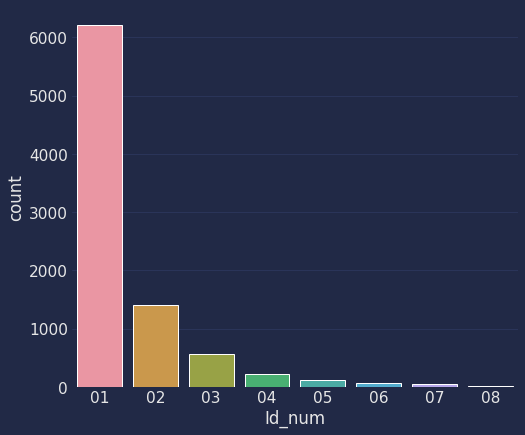

In [244]:
plt.figure(figsize=(8, 7))
sns.countplot(x='Id_num', data=train)

### Expenditure

In [245]:
train['Premium'] = train['RoomService'] + train['Spa'] + train['VRDeck']
train['Basic'] = train['FoodCourt'] + train['ShoppingMall']
train['All_Services'] = train['RoomService'] + train['Spa'] + train['VRDeck'] + train['FoodCourt'] + train['ShoppingMall']

In [246]:
test['Premium'] = test['RoomService'] + test['Spa'] + test['VRDeck']
test['Basic'] = test['FoodCourt'] + test['ShoppingMall']
test['All_Services'] = test['RoomService'] + test['Spa'] + test['VRDeck'] + test['FoodCourt'] + test['ShoppingMall']

### Name

In [247]:
train[['FirstName', 'LastName']] = train['Name'].str.split(' ', expand=True)

train['FamilySize'] = train['LastName'].map(lambda x: train['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)

In [248]:
test[['FirstName', 'LastName']] = test['Name'].str.split(' ', expand=True)

test['FamilySize'] = test['LastName'].map(lambda x: test['LastName'].value_counts()[x] if (str(x)) != 'nan' else x)

[(1.0, 18.0)]

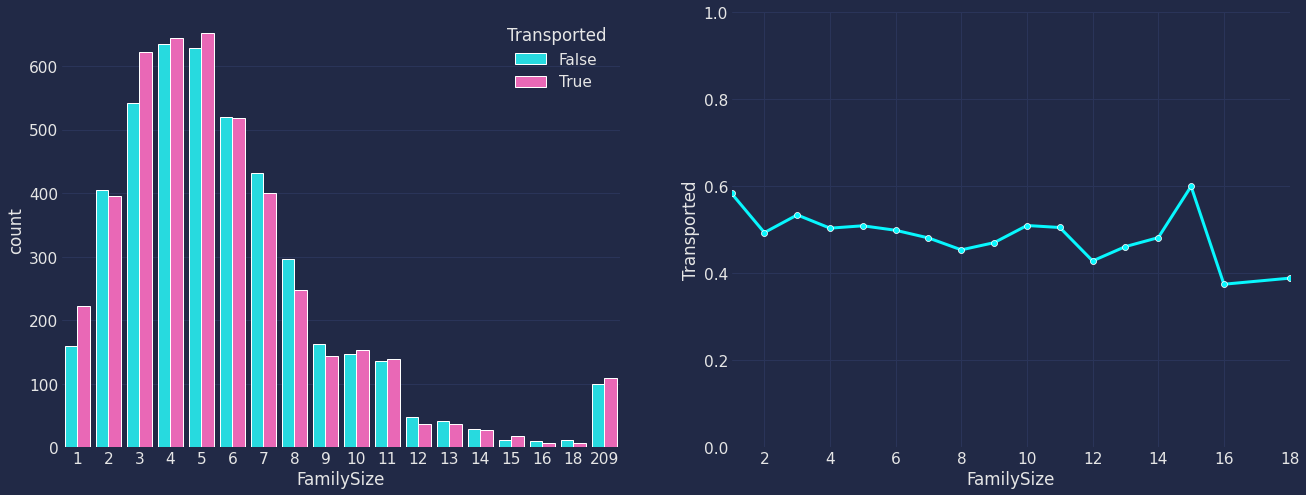

In [249]:
plt.subplots(figsize = (22, 8))
plt.subplot(1,2,1)
sns.countplot(x=train['FamilySize'], hue='Transported', data=train)

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot(x='FamilySize', y='Transported', data=train, ci=None, linewidth=3, marker="o").set(xlim = (1, 18))

# 5. Data wrangling

### Age binning

In [250]:
#training data

train.loc[train['Age'] <= 1, 'Age_Band'] = 'Infant'
train.loc[(train['Age'] > 1) & (train['Age'] <= 4), 'Age_Band'] = 'Toddler'
train.loc[(train['Age'] > 4) & (train['Age'] <= 12), 'Age_Band'] = 'Child'
train.loc[(train['Age'] > 12) & (train['Age'] <= 19), 'Age_Band'] = 'Teen'
train.loc[(train['Age'] > 19) & (train['Age'] <= 39), 'Age_Band'] = 'Adult'
train.loc[(train['Age'] > 39) & (train['Age'] <= 59), 'Age_Band'] = 'Mid_Age'
train.loc[train['Age'] > 59, 'Age_Band'] = 'Senior'

In [251]:
test.loc[test['Age'] <= 1, 'Age_Band'] = 'infant'
test.loc[(test['Age'] > 1) & (test['Age'] <= 4), 'Age_Band'] = 'toddler'
test.loc[(test['Age'] > 4) & (test['Age'] <= 12), 'Age_Band'] = 'child'
test.loc[(test['Age'] > 12) & (test['Age'] <= 19), 'Age_Band'] = 'teen'
test.loc[(test['Age'] > 19) & (test['Age'] <= 39), 'Age_Band'] = 'adult'
test.loc[(test['Age'] > 39) & (test['Age'] <= 59), 'Age_Band'] = 'mid_age'
test.loc[test['Age'] > 59, 'Age_Band'] = 'senior'

<AxesSubplot:xlabel='Age_Band', ylabel='Transported'>

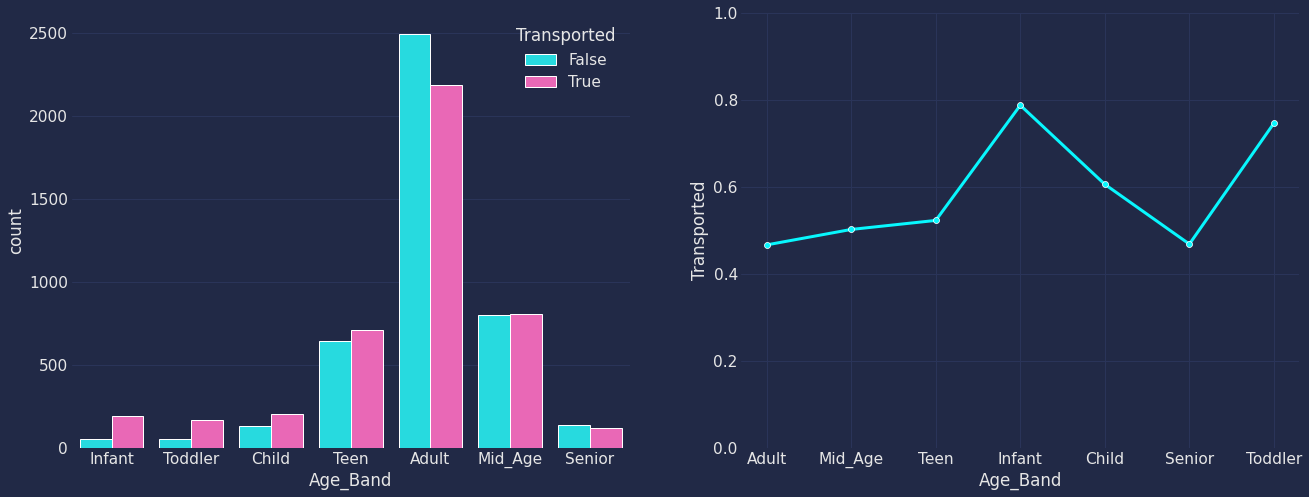

In [252]:
plt.subplots(figsize = (22, 8))
plt.subplot(1,2,1)
Age_Group = ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Mid_Age', 'Senior']
sns.countplot(x='Age_Band', hue='Transported', data=train, order=Age_Group)

plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot(x='Age_Band', y='Transported', data=train, ci=None, linewidth=3, marker="o")

## Dummy encoding

In [253]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinSide,Id_grp,Id_num,Premium,Basic,All_Services,FirstName,LastName,FamilySize,Age_Band
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,P,0001,01,0.0,0.0,0.0,Maham,Ofracculy,1,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,S,0002,01,702.0,34.0,736.0,Juanna,Vines,4,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,S,0003,01,6807.0,3576.0,10383.0,Altark,Susent,6,Mid_Age
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,S,0003,02,3522.0,1654.0,5176.0,Solam,Susent,6,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,S,0004,01,870.0,221.0,1091.0,Willy,Santantines,6,Teen


In [254]:
# Id_grp
train['Id_num'] = train['Id_num'].astype('int')
test['Id_num'] = test['Id_num'].astype('int')

In [255]:
# Id_grp
train['Id_grp'] = train['Id_grp'].astype('int')
test['Id_grp'] = test['Id_grp'].astype('int')

In [256]:
# Homeplanet
train['HomePlanet']=train['HomePlanet'].replace(['Europa','Earth','Mars'],[1,2,3])
test['HomePlanet']=test['HomePlanet'].replace(['Europa','Earth','Mars'],[1,2,3])

In [257]:
# Destination
train['Destination']=train['Destination'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'],[1,2,3])
test['Destination']=test['Destination'].replace(['TRAPPIST-1e','55 Cancri e','PSO J318.5-22'],[1,2,3])

In [258]:
# CryoSleep
train['CryoSleep'] = train['CryoSleep'].astype('int')
test['CryoSleep'] = test['CryoSleep'].astype('int')

In [259]:
# VIP
train['VIP'] = train['VIP'].astype('int')
test['VIP'] = test['VIP'].astype('int')

In [260]:
# CabinDeck
train['CabinDeck']=train['CabinDeck'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],[1,2,3,4,5,6,7,8])
test['CabinDeck']=test['CabinDeck'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],[1,2,3,4,5,6,7,8])

In [261]:
# CabinSide
train['CabinSide']=train['CabinSide'].replace(['S','P'],[1,2])
test['CabinSide']=test['CabinSide'].replace(['S','P'],[1,2])

In [262]:
train['Transported'] = train['Transported'].astype('int')

In [263]:
first_column = train.pop('Id_grp')
second_column = train.pop('Id_num')
third_column = train.pop('FirstName')
four_column = train.pop('LastName')
five_column = train.pop('FamilySize')
six_column = train.pop('Age')
seven_column = train.pop('Age_Band')
eight_column = train.pop('VIP')
nine_column = train.pop('RoomService')
ten_column = train.pop('FoodCourt')
eleven_column = train.pop('ShoppingMall')
twelve_column = train.pop('Spa')
thirteen_column = train.pop('VRDeck')
fourteen_column = train.pop('Basic')
fifteen_column = train.pop('Premium')
sixteen_column = train.pop('All_Services')
seventeen_column = train.pop('CabinDeck')
eighteen_column = train.pop('CabinNum')
nineteen_column = train.pop('CabinSide')
twenty_column = train.pop('CryoSleep')
twentyone_column = train.pop('HomePlanet')
twentytwo_column = train.pop('Destination')
twentythree_column = train.pop('Transported')

In [264]:
train.insert(0, 'Id_grp', first_column)
train.insert(1, 'Id_num', second_column)
train.insert(2, 'FirstName', third_column)
train.insert(3, 'LastName', four_column)
train.insert(4, 'FamilySize', five_column)
train.insert(5, 'Age', six_column)
train.insert(6, 'Age_Band', seven_column)
train.insert(7, 'VIP', eight_column)
train.insert(8, 'RoomService', nine_column)
train.insert(9, 'FoodCourt', ten_column)
train.insert(10, 'ShoppingMall', eleven_column)
train.insert(11, 'Spa', twelve_column)
train.insert(12, 'VRDeck', thirteen_column)
train.insert(13, 'Basic', fourteen_column)
train.insert(14, 'Premium', fifteen_column)
train.insert(15, 'All_Services', sixteen_column)
train.insert(16, 'CabinDeck', seventeen_column)
train.insert(17, 'CabinNum', eighteen_column)
train.insert(18, 'CabinSide', nineteen_column)
train.insert(19, 'CryoSleep', twenty_column)
train.insert(20, 'HomePlanet', twentyone_column)
train.insert(21, 'Destination', twentytwo_column)
train.insert(22, 'Transported', twentythree_column)

In [265]:
# dummy features
train = pd.get_dummies(train,columns=['Age_Band'])
test = pd.get_dummies(test,columns=['Age_Band'])

In [266]:
print('train', train.shape)
print('test', test.shape)

train (8693, 33)
test (4277, 31)


In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_grp            8693 non-null   int64  
 1   Id_num            8693 non-null   int64  
 2   FirstName         8693 non-null   object 
 3   LastName          8693 non-null   object 
 4   FamilySize        8693 non-null   int64  
 5   Age               8693 non-null   float64
 6   VIP               8693 non-null   int64  
 7   RoomService       8693 non-null   float64
 8   FoodCourt         8693 non-null   float64
 9   ShoppingMall      8693 non-null   float64
 10  Spa               8693 non-null   float64
 11  VRDeck            8693 non-null   float64
 12  Basic             8693 non-null   float64
 13  Premium           8693 non-null   float64
 14  All_Services      8693 non-null   float64
 15  CabinDeck         8693 non-null   int64  
 16  CabinNum          8693 non-null   int64  


In [268]:
train=train.drop(['PassengerId', 'Cabin', 'IsChild', 'Name', 'FirstName', 'LastName'], axis=1)
test=test.drop(['PassengerId', 'Cabin', 'Name', 'FirstName', 'LastName'], axis=1)

# Model

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
 
# importing stacking lib
from vecstack import stacking

from sklearn.model_selection import train_test_split

In [270]:
train.columns

Index(['Id_grp', 'Id_num', 'FamilySize', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Basic', 'Premium',
       'All_Services', 'CabinDeck', 'CabinNum', 'CabinSide', 'CryoSleep',
       'HomePlanet', 'Destination', 'Transported', 'Age_Band_Adult',
       'Age_Band_Child', 'Age_Band_Infant', 'Age_Band_Mid_Age',
       'Age_Band_Senior', 'Age_Band_Teen', 'Age_Band_Toddler'],
      dtype='object')

In [271]:
# getting target data from the dataframe
y = train["Transported"]
 
# getting train data from the dataframe
x = train.drop(["Transported"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=0)

In [272]:
from catboost import CatBoostClassifier
import xgboost as xgb


model=xgb.XGBClassifier(max_depth=8,learning_rate=0.06, iterations=189,random_seed=42)

In [273]:
model.fit(x_train,y_train)

[09:34:11] WARNING: ../src/learner.cc:627: 
Parameters: { "iterations", "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', iterations=189,
              learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_seed=42,
              random_state=0, ...)

In [274]:
pred_y=model.predict(x_test)

In [275]:
cat_pred=model.predict(x_test)
print("accuracy_score = ", accuracy_score(y_test.values,cat_pred))

accuracy_score =  0.80448533640023


In [276]:
model=xgb.XGBClassifier(max_depth=8,learning_rate=0.06, iterations=189,random_seed=42)


model.fit(x, y)

[09:34:14] WARNING: ../src/learner.cc:627: 
Parameters: { "iterations", "random_seed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', iterations=189,
              learning_rate=0.06, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_seed=42,
              random_state=0, ...)

In [277]:
submission = model.predict(test)

In [278]:
test_id=test['PassengerId']
submission_pred = clf.predict(test.drop('PassengerId', axis=1))

df=pd.DataFrame({"PassengerId":test_id.values,"Survived":submission_pred,})

KeyError: 'PassengerId'

In [ ]:
df.to_csv("Submission.csv",index=False)

df=pd.read_csv('Submission.csv')
df.info()